In [1]:
import pymolzilla.processing as pm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
  


import numdifftools as nd

In [2]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

In [3]:
f = pm.ferh_fm_zeynab()
f.load()
f.preprocess()
f.process()
f.df

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
loading set: 9
loading set: 10
loading set: 11
loading set: 12
loading set: 13
loading set: 14
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
preprocessing set: 9
preprocessing set: 10
preprocessing set: 11
preprocessing set: 12
preprocessing set: 13
preprocessing set: 14
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
processing set: 9
processing set: 10
processing set: 11
processing set: 12
processing set: 13
processing set: 14


,set,obj,wavelength,flags,sample_rotation,hext
0,0460_L,<pymolzilla.processing.file_import.SetRotmld o...,460,L,0,50
1,0530_L,<pymolzilla.processing.file_import.SetRotmld o...,530,L,0,50
2,0620_L,<pymolzilla.processing.file_import.SetRotmld o...,620,L,0,50
3,0710_H,<pymolzilla.processing.file_import.SetRotmld o...,710,H,0,207
4,0710_L,<pymolzilla.processing.file_import.SetRotmld o...,710,L,0,50
5,0810_L,<pymolzilla.processing.file_import.SetRotmld o...,810,L,0,50
6,0920_L,<pymolzilla.processing.file_import.SetRotmld o...,920,L,0,50
7,1050_H,<pymolzilla.processing.file_import.SetRotmld o...,1050,H,0,207
8,1050_L,<pymolzilla.processing.file_import.SetRotmld o...,1050,L,0,50
9,1200_L,<pymolzilla.processing.file_import.SetRotmld o...,1200,L,0,50


In [4]:
f.analyze()

analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
analyzing set: 9
analyzing set: 10
analyzing set: 11
analyzing set: 12
analyzing set: 13
analyzing set: 14
postprocessing


In [6]:
for i,ff in enumerate(f):
    print(f.df['set'].iloc[i],': ', ff.fit_anisotropy.results.x)

0460_L :  [ 0.0531277  -0.76521133 -0.72182777  0.06394697]
0530_L :  [-0.36430537 -0.75571799 -0.71641696  0.10180648]
0620_L :  [-0.42420641 -0.79854436 -0.67107086  0.09898737]
0710_H :  [-0.46988388 -2.81547193 -0.61296598  0.15099226]
0710_L :  [-0.35137661 -0.79538477 -0.67510969  0.09708581]
0810_L :  [-0.31806116 -0.76779944 -0.67708949  0.09842883]
0920_L :  [-0.14877897 -0.9549806  -0.49846708  0.00528857]
1050_H :  [-0.49500874 -2.9069048  -0.50013022  0.129265  ]
1050_L :  [-0.12268097 -0.76399868 -0.65935973  0.08879261]
1200_L :  [-0.25084646 -0.69139519 -0.66614899  0.10405171]
1400_L :  [-0.30245607 -0.78504005 -0.60898834  0.11416078]
1600_H :  [-0.52039376 -2.69792778 -0.69767483  0.17255025]
1600_HR :  [-0.77792376 -2.73149273 -0.64493876  0.35886381]
1600_L :  [-0.28418736 -0.81918014 -0.64023481  0.1102097 ]
1600_LR :  [-0.08013894 -0.80093946 -0.52872703  0.30285464]


In [8]:
ind0 = [0,1,2,4,5,6,8,9,10,13]
ind1 = [3,7,11]
ind2 = [14]
ind3 = [12]

kux = np.array(list(map(lambda ff: ff.fit_anisotropy.results.x[0]*2,f)))
kuy = np.array(list(map(lambda ff: ff.fit_anisotropy.results.x[1]*2,f)))
k4x = np.array(list(map(lambda ff: ff.fit_anisotropy.results.x[2]*8,f)))
k4y = np.array(list(map(lambda ff: ff.fit_anisotropy.results.x[3]*8,f)))

In [9]:
for i in ind0:
    print(f.df['set'].iloc[i],': ', f[i].fit_anisotropy.results.x)
    
print('kux:', kux[ind0].min(), kux[ind0].max())
print('kuy:', kuy[ind0].min(), kuy[ind0].max())
print('k4x:', k4x[ind0].min(), k4x[ind0].max())
print('k4y:', k4y[ind0].min(), k4y[ind0].max())

0460_L :  [ 0.0531277  -0.76521133 -0.72182777  0.06394697]
0530_L :  [-0.36430537 -0.75571799 -0.71641696  0.10180648]
0620_L :  [-0.42420641 -0.79854436 -0.67107086  0.09898737]
0710_L :  [-0.35137661 -0.79538477 -0.67510969  0.09708581]
0810_L :  [-0.31806116 -0.76779944 -0.67708949  0.09842883]
0920_L :  [-0.14877897 -0.9549806  -0.49846708  0.00528857]
1050_L :  [-0.12268097 -0.76399868 -0.65935973  0.08879261]
1200_L :  [-0.25084646 -0.69139519 -0.66614899  0.10405171]
1400_L :  [-0.30245607 -0.78504005 -0.60898834  0.11416078]
1600_L :  [-0.28418736 -0.81918014 -0.64023481  0.1102097 ]
kux: -0.8484128270245911 0.10625540741057045
kuy: -1.9099612079528467 -1.3827903894771003
k4x: -5.77462219585739 -3.987736623861202
k4y: 0.04230852698159112 0.9132862693343354


In [16]:
f.df = f.df.iloc[ind0]

In [33]:
npoints = 50

ex1 = [-1.3,  0.2]
ey1 = [-1, -2.5]

x1 = np.linspace(*ex1, npoints)
y1 = np.linspace(*ey1, npoints)
xx1, yy1 = np.meshgrid(x1, y1)

ex2 = [-6.5, -4.5]
ey2 = [0,  2]

x2 = np.linspace(*ex2, npoints)
y2 = np.linspace(*ey2, npoints)
xx2, yy2 = np.meshgrid(x2, y2)

dof = 62

In [34]:
def g1(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([x/2,y/2,k[2],k[3]])
def g2(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([k[0],k[1],x/8,y/8])

def gglev(num):
    ssr = f[num].fit_anisotropy.obj(f[num].fit_anisotropy.results.x)
    return ssr*(1+4./dof)

def gg1(num):
    return np.vectorize(g1)(xx1,yy1,num)
    
def gg2(num):
    return np.vectorize(g2)(xx2,yy2,num)

zz1=[]
zz2=[]
lev=[]
for i,ff in enumerate(f):
    print('computing set:',i)
    zz1 += [gg1(i)]
    zz2 += [gg2(i)]
    lev += [gglev(i)]
print('finished')

computing set: 0
computing set: 1
computing set: 2
computing set: 3
computing set: 4
computing set: 5
computing set: 6
computing set: 7
computing set: 8
computing set: 9
finished


u 0
4 0
u 1
4 1
u 2
4 2
u 3
4 3
u 4
4 4
u 5
4 5
u 6
4 6
u 7
4 7
u 8
4 8
u 9
4 9


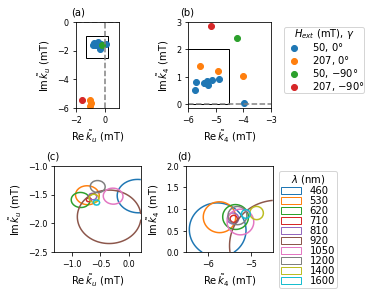

In [43]:
fgx, ((axx1, axx2),(ax1,ax2)) = plt.subplots(2,2, figsize=(5,4), constrained_layout=True)


# horni grafy
#############


axx1.axhline(0, color='grey', linestyle='dashed')
axx1.axvline(0, color='grey', linestyle='dashed')
axx2.axhline(0, color='grey', linestyle='dashed')
#axx2.axvline(0, color='grey', linestyle='dashed')

rec1 = patches.Rectangle((ex1[0],ey1[0]),ex1[1]-ex1[0],ey1[1]-ey1[0], edgecolor='black', fill=False)
rec2 = patches.Rectangle((ex2[0],ey2[0]),ex2[1]-ex2[0],ey2[1]-ey2[0], edgecolor='black', fill=False)
axx1.add_patch(rec1)
axx2.add_patch(rec2)


axx1.scatter(kux[ind0], kuy[ind0], c='C0')
axx1.scatter(kux[ind1], kuy[ind1], c='C1')
axx1.scatter(kux[ind2], kuy[ind2], c='C2')
axx1.scatter(kux[ind3], kuy[ind3], c='C3')
axx2.scatter(k4x[ind0], k4y[ind0], c='C0', label=r'50, $0\degree$')
axx2.scatter(k4x[ind1], k4y[ind1], c='C1', label=r'207, $0\degree$')
axx2.scatter(k4x[ind2], k4y[ind2], c='C2', label=r'50, $-90\degree$')
axx2.scatter(k4x[ind3], k4y[ind3], c='C3', label=r'207, $-90\degree$')


axx1.set_aspect(1)
axx2.set_aspect(1)
axx1.set_xlim(-2,1)
axx1.set_ylim(-6,0)
axx2.set_xlim(-6,-3)


axx1.text(-0.1, 1.08, "(a)", transform=axx1.transAxes)
axx2.text(-0.1, 1.08, "(b)", transform=axx2.transAxes)

axx1.set_xlabel(r"$\operatorname{Re} \tilde{k}_u$ (mT)")
axx2.set_xlabel(r"$\operatorname{Re} \tilde{k}_4$ (mT)")
axx1.set_ylabel(r"$\operatorname{Im} \tilde{k}_u$ (mT)")
axx2.set_ylabel(r"$\operatorname{Im} \tilde{k}_4$ (mT)")

axx2.legend(bbox_to_anchor=(1.1,1), title=r'$H_{ext}$ (mT), $\gamma$', borderpad=0, labelspacing=0)

# spodni grafy
##############

arts=[]
labels=[]

for i,ff in enumerate(f):
    print('u',i)
    ax1.contour(xx1,yy1,zz1[i], levels=[lev[i]], colors='C'+str(i))
    print('4',i)
    ax2.contour(xx2,yy2,zz2[i], levels=[lev[i]], colors='C'+str(i))
    arts+=[patches.Ellipse((0,0),1,1,fill=False,edgecolor='C'+str(i))]
    labels+=[str(f.df['wavelength'].iloc[i])]


ax1.set_aspect(1)
ax2.set_aspect(1)

ax1.text(-0.1, 1.08, "(c)", transform=ax1.transAxes)
ax2.text(-0.1, 1.08, "(d)", transform=ax2.transAxes)

ax1.set_xlabel(r"$\operatorname{Re} \tilde{k}_u$ (mT)")
ax2.set_xlabel(r"$\operatorname{Re} \tilde{k}_4$ (mT)")
ax1.set_ylabel(r"$\operatorname{Im} \tilde{k}_u$ (mT)")
ax2.set_ylabel(r"$\operatorname{Im} \tilde{k}_4$ (mT)")

ax2.legend(arts,labels,title=r'$\lambda$ (nm)', borderpad=0.2, labelspacing=0, bbox_to_anchor=(1.8,1))


fgx.savefig('out/ferh-spatna-anizotropie.pdf')